<a href="https://colab.research.google.com/github/kamwele/GDA_Live_coding_FML23/blob/main/john_mutinda_regularized_linear_regression_in__pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [95]:
import numpy as np
import pandas as pd 
from sklearn import datasets

In [96]:
X,Y = datasets.make_regression(n_samples = 80, n_features = 7,
                                n_informative = 4, n_targets = 1,
                                noise = 0.0, coef = False)

In [97]:
X.shape

(80, 7)

In [98]:
Y.shape

(80,)

In [99]:
Y=Y.reshape(-1,1)
Y

array([[  21.09219336],
       [   4.7814571 ],
       [  91.83088883],
       [ -57.62991648],
       [  36.32904972],
       [  86.81853977],
       [  60.66494041],
       [  -9.87760528],
       [ 113.46680394],
       [  33.59192492],
       [  -1.51139373],
       [-132.58988955],
       [   1.45820221],
       [  36.24383765],
       [  24.1092901 ],
       [ 166.35134128],
       [ -14.42931861],
       [ -46.45395432],
       [  16.01772184],
       [  33.70510635],
       [ -75.45020877],
       [  55.66572292],
       [  -4.92681291],
       [  60.14182764],
       [  45.01515936],
       [ 115.79956621],
       [ -18.25812253],
       [ -38.90505793],
       [ -67.54266802],
       [ 116.48533679],
       [ -36.61247089],
       [ -10.62313257],
       [  18.67459735],
       [  14.43957526],
       [ -80.63692044],
       [ -82.88384745],
       [ -38.94420937],
       [  47.81964597],
       [ 113.5736023 ],
       [-130.2684493 ],
       [ -56.65199507],
       [ -61.637

In [141]:
import torch.nn as nn
import torch.optim as optim
 
# loss function and optimizer
model=nn.Sequential(nn.Linear(7,24),nn.ReLU(),nn.Linear(24,1))
loss_fn = nn.MSELoss()  # mean square error
optimizer = optim.SGD(model.parameters(), lr=0.0001)

In [142]:
model

Sequential(
  (0): Linear(in_features=7, out_features=24, bias=True)
  (1): ReLU()
  (2): Linear(in_features=24, out_features=1, bias=True)
)

In [143]:

for name, param in model.named_parameters():
  print(name, param)
  print(param.shape)

0.weight Parameter containing:
tensor([[-0.2167,  0.1276, -0.0219,  0.1783, -0.3058,  0.0219,  0.2811],
        [ 0.1671,  0.3026,  0.1353,  0.0412,  0.3439, -0.1385,  0.3483],
        [-0.0482,  0.0347,  0.1021, -0.1313, -0.3078, -0.3219,  0.1593],
        [-0.0543, -0.0777, -0.0037,  0.2371, -0.3762,  0.2611,  0.1114],
        [-0.0863, -0.1978,  0.2594, -0.0853,  0.2119, -0.1479, -0.1717],
        [ 0.3419,  0.3340, -0.0479, -0.1730, -0.1755,  0.0753, -0.2553],
        [ 0.2330, -0.3176, -0.3270,  0.2113, -0.3558,  0.2416,  0.1095],
        [ 0.0765, -0.1504,  0.1893,  0.0694, -0.0313, -0.2252,  0.1344],
        [-0.1664, -0.1905,  0.0427, -0.1901, -0.1858, -0.2146, -0.3744],
        [ 0.1598, -0.0548,  0.1207, -0.0399,  0.1718,  0.3597, -0.3176],
        [-0.3396,  0.2086, -0.1818, -0.1994, -0.0760, -0.2693, -0.0712],
        [ 0.1684, -0.0344, -0.1857, -0.3022, -0.3534, -0.1064,  0.2150],
        [ 0.2696,  0.1454,  0.2556, -0.0397, -0.0802,  0.1210, -0.3731],
        [ 0.3401, -0

In [144]:
def split(x,y):
  frac=0.8
  lene=int(0.8*len(x))
  x_train=x[:lene,:]
  x_test=x[lene:,:]
  y_train=y[:lene,0]
  y_test=y[lene:,0]
  return x_train,x_test,y_train,y_test
x_train,x_test,y_train,y_test=split(X,Y)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(64, 7) (16, 7) (64,) (16,)


In [145]:
# convert x_train,y_train into pytorch data
import torch
X_train=torch.tensor(x_train,dtype=torch.float32)
X_test=torch.tensor(x_test,dtype=torch.float32)
Y_train=torch.tensor(y_train,dtype=torch.float32)
Y_test=torch.tensor(y_test,dtype=torch.float32)
print(X_train)

tensor([[ 2.3489e-01, -4.6416e-01,  1.2400e+00,  2.0620e+00, -8.7562e-01,
          7.5425e-01,  1.6505e-01],
        [ 9.6291e-01,  5.2509e-01,  5.8933e-01, -4.1520e-01, -9.2110e-01,
         -6.1383e-01,  4.7710e-01],
        [ 3.3668e-01,  5.0419e-01,  3.3613e-01, -1.1305e+00,  1.2406e+00,
         -1.1590e+00,  8.3918e-01],
        [ 7.0424e-01, -1.1721e+00, -1.5462e-02, -2.2612e+00, -6.2908e-01,
          1.0814e-01, -5.5865e-01],
        [ 1.1800e+00, -7.5558e-01,  6.3977e-01, -1.7463e-01,  4.5073e-01,
         -2.2155e-01, -1.0565e-03],
        [-9.7928e-02,  1.2869e+00,  7.7794e-01,  1.1289e+00,  1.2641e+00,
         -9.9762e-01,  2.4229e-01],
        [-7.8942e-02,  2.0955e+00,  4.2291e-02, -1.5294e+00,  1.3681e+00,
          7.0321e-01,  2.9215e-01],
        [-1.3416e+00, -4.5207e-01, -1.1194e-01, -1.5615e+00,  1.0681e+00,
          1.8215e-01, -8.8348e-01],
        [-1.6460e+00,  5.8121e-01,  1.6299e+00, -5.1532e-01, -2.4076e-01,
          1.9421e+00,  1.5767e+00],
        [-

In [146]:
# compute the loss
loss=loss_fn(model(X_train),Y_train)
loss


tensor(4487.9062, grad_fn=<MseLossBackward0>)

In [147]:
# L1 REGULARIZATION
lambda_l1=0.09
l1 = 0
for p in model.parameters():
  l1 = l1 + p.abs().sum()
  loss = loss + lambda_l1 * l1
print(l1)


tensor(38.4476, grad_fn=<AddBackward0>)


In [148]:
lambda_l1=0.09
l1 = 0
for p in model.parameters():
  l1 = l1 + torch.norm(p,2).pow(2).sum()
  loss = loss + lambda_l1 * l1
print(l1)


tensor(9.1343, grad_fn=<AddBackward0>)


In [149]:
loss_fn(model(X_test),Y_test)

tensor(9488.7285, grad_fn=<MseLossBackward0>)

In [150]:
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np
import os
import torch
from torch import nn
from torchvision.datasets import MNIST
from torch.utils.data import DataLoader
from torchvision import transforms

epoch: 10, loss = 4438.4624
epoch: 20, loss = 4438.4614
epoch: 30, loss = 4438.4604
epoch: 40, loss = 4438.4595
epoch: 50, loss = 4438.4585
epoch: 60, loss = 4438.4575
epoch: 70, loss = 4438.4570
epoch: 80, loss = 4438.4561
epoch: 90, loss = 4438.4556
epoch: 100, loss = 4438.4546
epoch: 110, loss = 4438.4536
epoch: 120, loss = 4438.4536
epoch: 130, loss = 4438.4521
epoch: 140, loss = 4438.4517
epoch: 150, loss = 4438.4512
epoch: 160, loss = 4438.4502
epoch: 170, loss = 4438.4497
epoch: 180, loss = 4438.4487
epoch: 190, loss = 4438.4482
epoch: 200, loss = 4438.4473
epoch: 210, loss = 4438.4468
epoch: 220, loss = 4438.4458
epoch: 230, loss = 4438.4453
epoch: 240, loss = 4438.4448
epoch: 250, loss = 4438.4438
epoch: 260, loss = 4438.4438
epoch: 270, loss = 4438.4429
epoch: 280, loss = 4438.4419
epoch: 290, loss = 4438.4419
epoch: 300, loss = 4438.4414
epoch: 310, loss = 4438.4409
epoch: 320, loss = 4438.4395
epoch: 330, loss = 4438.4390
epoch: 340, loss = 4438.4385
epoch: 350, loss = 4438

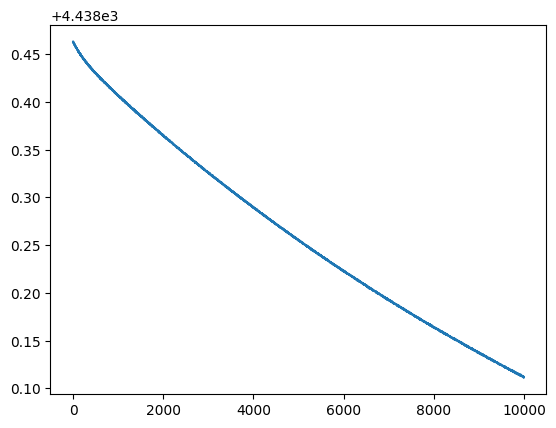

In [154]:
# divide the data into batches and train the model
los=[]
num_epochs = 10000
for epoch in range(num_epochs):
    # Forward pass and loss
    y_predicted = model(X_train)

    ##compute the loss between your prediction and the true y
    loss = loss_fn(y_predicted, Y_train)
    lambda_l1=0.09
    l1 = 0
    for p in model.parameters():
      l1 = l1 + torch.norm(p,2).pow(2).sum()
    loss = loss + lambda_l1 * l1
    
    
    # Backward pass 
    loss.backward()

    ## update parameters
    optimizer.step()
    

    # zero grad before new step
    optimizer.zero_grad()
    los.append(loss.item())
    # print(los)
   

    if (epoch+1) % 10 == 0:
        print(f'epoch: {epoch+1}, loss = {loss.item():.4f}')

# Plot
plt.plot(los)

In [115]:
print(model.parameters())

<generator object Module.parameters at 0x7fd3e4961350>


In [57]:
print(model.bias)

Parameter containing:
tensor([-0.2394], requires_grad=True)
